# 0-vanilla

Creates the most simple autoencoder.

input_dims is an integer containing the dimensions of the model input

hidden_layers is a list containing the number of nodes for each hidden layer in the encoder, respectively

the hidden layers should be reversed for the decoder

latent_dims is an integer containing the dimensions of the latent space representation

Returns: encoder, decoder, auto
encoder is the encoder model
decoder is the decoder model
auto is the full autoencoder model

The autoencoder model should be compiled using adam optimization and binary cross-entropy loss

All layers should use a relu activation except for the last layer in the decoder, which should use sigmoid

In [1]:
#!/usr/bin/env python3
"""
Vanilla autoencoder
"""

import tensorflow.keras as keras


def autoencoder(input_dim, hidden_layers, latent_dim):
    """
    Makes a vanilla autoencoder
    """
    encoder_input = keras.layers.Input(shape=(input_dim,))
    encoder_output = encoder_input
    
    for units in hidden_layers:
        encoder_output = keras.layers.Dense(
            units, activation='relu'
        )(encoder_output)
    
    latent_space = keras.layers.Dense(
        latent_dim, activation='relu'
    )(encoder_output)
    encoder = keras.models.Model(encoder_input, latent_space)
    
    decoder_input = keras.layers.Input(shape=(latent_dim,))
    decoder_output = decoder_input
    
    for units in reversed(hidden_layers):
        decoder_output = keras.layers.Dense(
            units, activation='relu'
        )(decoder_output)
    
    decoder_output = keras.layers.Dense(
        input_dim, activation='sigmoid'
    )(decoder_output)
    decoder = keras.models.Model(decoder_input, decoder_output)
    
    auto_out = encoder(encoder_input)
    auto_out = decoder(auto_out)
    autoenc = keras.models.Model(encoder_input, auto_out)
    autoenc.compile(optimizer='adam', loss='binary_crossentropy')
    
    return encoder, decoder, autoenc


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4644 - val_loss: 0.3220
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3153 - val_loss: 0.3085
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3045 - val_loss: 0.3024
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2991 - val_loss: 0.2985
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2955 - val_loss: 0.2958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
4.1783204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


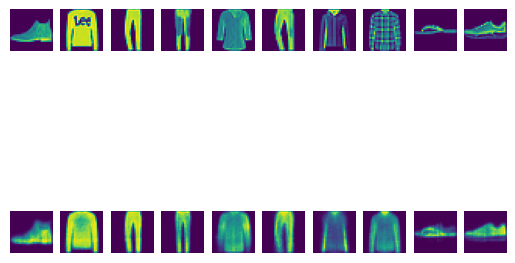

In [2]:
# Main file

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist


autoencoder = autoencoder

# (x_train, _), (x_test, _) = mnist.load_data()
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.random.set_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32)
auto.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()